1. Read the dataset to python environment

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [58]:
# Load the Iris dataset
from sklearn.datasets import load_iris


In [38]:

iris = load_iris()
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df["class"] = iris.target

In [59]:
# Separate features and target variable
X = iris_df.drop("class", axis=1)
y = iris_df["class"]


In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

In [66]:
#Create a dictionary to store the results
results = {}

In [67]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
results["Decision Tree"] = dt_scores.mean()



In [68]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
results["K-Nearest Neighbors"] = knn_scores.mean()

In [69]:
# Support Vector Machine
svm_model = SVC(random_state=42)
svm_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
results["Support Vector Machine"] = svm_scores.mean()

In [70]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
results["Random Forest"] = rf_scores.mean()

In [71]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
results["Logistic Regression"] = lr_scores.mean()


In [72]:
# Naive Bayes
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=5)
results["Naive Bayes"] = nb_scores.mean()


In [73]:
# Print the results
for model, score in results.items():
    print(f"{model}: {score}")

Decision Tree: 0.95
K-Nearest Neighbors: 0.925
Support Vector Machine: 0.95
Random Forest: 0.95
Logistic Regression: 0.9583333333333334
Naive Bayes: 0.9416666666666668


In [74]:
# Find the best model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name}")



Best Model: Logistic Regression


In [75]:
# Create an instance of the best model
if best_model_name == "Decision Tree":
    best_model = DecisionTreeClassifier(random_state=42)
elif best_model_name == "K-Nearest Neighbors":
    best_model = KNeighborsClassifier()
elif best_model_name == "Support Vector Machine":
    best_model = SVC(random_state=42)
elif best_model_name == "Random Forest":
    best_model = RandomForestClassifier(random_state=42)
elif best_model_name == "Logistic Regression":
    best_model = LogisticRegression(random_state=42)
elif best_model_name == "Naive Bayes":
    best_model = GaussianNB()

In [76]:
# Train the best model on the full training set
best_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [77]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the Best Model ({best_model_name}): {accuracy}")

Test Accuracy of the Best Model (Logistic Regression): 1.0


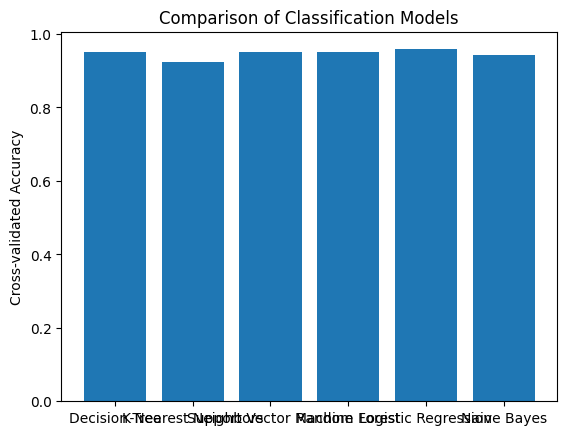

In [78]:
# You can also visualize the results
plt.bar(results.keys(), results.values())
plt.ylabel('Cross-validated Accuracy')
plt.title('Comparison of Classification Models')
plt.show()